In [ ]:
c:\Users\fanny\Projekt_OS_Ungern\Egna_anteckningar\Notes.ipynbc:\Users\fanny\Projekt_OS_Ungern\Egna_anteckningar\Notes.ipynb

1920 - Ungen förbjöds att vara med pga sin roll och inblandning i första världskriget.  
  

1984 - Ungern bojkottade OS 1984 i Los Angeles, tillsammans med andra öststatländer, som svar på den USA-ledda bojkotten av OS i Moskva 1980. Bojkotten var en politisk handling som genomfördes på Sovjetunionens begäran. 
Orsak: Bojkotten var en vedergällning för den bojkott som USA och andra länder genomförde mot OS i Moskva 1980.
Beslut: Ungern deltog inte eftersom de, likt andra socialistiska länder, följde Sovjetunionens beslut.  
  
(1980 - USA ledde en bojkott av de Olympiska spelen i Moskva som en protest mot Sovjets invasion av Afghanistan. Ytterligare 60 länder deltog i bojkotten, bland annat Kina.)  
  
1984 - Som en följd av det Kalla kriget bojkottade Sovjet och många andra länder i östblocket de Olympiska spelen i Los Angeles.  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import numpy as np
import hashlib

# Ladda in data
athletes = pd.read_csv("athlete_events.csv")
noc = pd.read_csv("noc_regions.csv")


In [6]:
# Slå ihop dataset för att få med regionnamn
data_raw = pd.merge(athletes, noc, on="NOC", how="left")


**UPPGIFT 1** - 
Annonymiserar alla namn med hashfunktionen SHA-256:

In [ ]:
# Tar en kopia av originaldatasetet
data = data_raw.copy()

# Funktion för SHA-256-hash av namn (med salt)
def hash_name(name: str, salt: str = "") -> str:
    if pd.isna(name):
        return np.nan
    text = (salt + name.strip().lower()).encode("utf-8")
    return hashlib.sha256(text).hexdigest()

# Salt för hashning
SALT = "projekt_os_salt"

# Skapar hash-kolumn för ALLA deltagare
data["Name_hash"] = data["Name"].map(lambda x: hash_name(x, SALT))

# Tar bort originalnamnet för att anonymisera
data = data.drop(columns=["Name"])

# Sparar som ny fil (hela datasetet anonymiserat)
data.to_csv("data_anonymized.csv", index=False)

# Dubbelkollar resultatet
print(data[["NOC", "Name_hash"]].head())
print("Antal unika hashade individer:", data["Name_hash"].nunique())

   NOC                                          Name_hash
0  CHN  e71264f789929eef276224b1e25d5e185f119ca2babeb2...
1  CHN  350bf0f45aa9097774cb74c13c00a4aeb5bf1bf7fbe965...
2  DEN  6f9c7d628645d2e9cb62f48f95c92d4c1c4fd9d87363c3...
3  DEN  0d4fe3228bf1e6c7fbb70439640aa9a0095f8bdccaf2fb...
4  NED  6fceadb641dfc1e3230bf9d5fb7f6753142deac33ccb43...
Antal unika hashade individer: 134730


Kollar om det finns dubbletter i datan:

In [ ]:
dup_ID = data.duplicated(subset=["ID"], keep=False)

duplicates = (
    data[dup_ID]
    .sort_values(["ID"])
)

print(f"{len(duplicates)} dubbletter.") 

193215 dubbletter.


Att det finns många dubbletter på deltagarens ID i datan (var uppmärksam på att även "orginalet" räknas in här) är inte särskilt konstigt. Ofta deltar samma person under olika år eller i olika sport/gren.   
Kollar istället om det finns rader där ID, Year och Event alla är samma.  
Då behålls de dubbletter som beror på att deltagaren medverkat vid olika tillfällen (Year) och grenar(Event): 

In [ ]:
dup_ID_year_event = data.duplicated(subset=["ID", "Year", "Event"], keep=False)

duplicates_2 = (
    data[dup_ID_year_event]
    .sort_values(["ID", "Year", "Event"])
)

print(f"{len(duplicates_2)} dubbletter.") 



2167 dubbletter.


In [ ]:
duplicates.head(10) 

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Name_hash
1251,704,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN,8930a5a36ee9629d43e52ebc32dbde6ba2dc93a1adc310...
1252,704,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN,8930a5a36ee9629d43e52ebc32dbde6ba2dc93a1adc310...
4017,2317,M,NaN,NaN,NaN,Martha-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,France,NaN,0854bc75bd7259340c234c836bd056f1e0af8b600f6f6b...
4018,2317,M,NaN,NaN,NaN,Martha-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Bronze,France,NaN,0854bc75bd7259340c234c836bd056f1e0af8b600f6f6b...
4281,2449,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN,180ec6c14d2a02e498481799de7b3a2cd8dfac146eade3...
4282,2449,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN,180ec6c14d2a02e498481799de7b3a2cd8dfac146eade3...
4283,2449,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN,180ec6c14d2a02e498481799de7b3a2cd8dfac146eade3...
4863,2777,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN,f2c244afd80afa5b7971daca9b91e7328c27a6c40edffb...
4864,2777,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN,f2c244afd80afa5b7971daca9b91e7328c27a6c40edffb...
4861,2777,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN,f2c244afd80afa5b7971daca9b91e7328c27a6c40edffb...


In [37]:
# show latest year with duplicates
duplicates["Year"].max()       

NameError: name 'duplicates' is not defined

Dubbletter finns endast fram till år 1948 (utifrån ID, Year och Event). 

In [ ]:
duplicates_bf_1952 = duplicates[duplicates["Year"] < 1952]  
duplicates_af_1952 = duplicates[duplicates["Year"] >= 1952] 

print(f"Dubbletter före 1952: {len(duplicates_bf_1952)}")
print(f"Dubbletter från och med 1952: {len(duplicates_af_1952)}")   

Dubbletter före 1952: 2167
Dubbletter från och med 1952: 0


In [ ]:
duplicates_art_competition = duplicates[duplicates["Sport"] == "Art Competitions"]
print(f"Dubbletter inom 'Art Competitions': {len(duplicates_art_competition)}")

Dubbletter inom 'Art Competitions': 1883


Och nästan alla (1883 av 2167) är inom sporten "Art competitions". 

Dubbletter bara funna innan år 1948 - Flest dubbletter inom sporten "art competitions". 
Körde en googling på detta och det visade sig att "Art competitions" som OS-sport försvann 1952. 

När jag kollar på "Event" ser det ut som att denna har kategoriserats annorlunda, med flera grenar inom samma event. Så förmodligen är egentligen inte dubbletterna dubbletter, men de är otydliga, då vi inte vet exakt vilken "gren" deltagaren medverkat i. Väljer att behålla dubbletterna.

 

Art competitions - konst kopplat till sport. 
Art competitions togs bort efter OS i London 1948.

Källa: https://en.wikipedia.org/wiki/Art_competitions_at_the_Summer_Olympics

**Sorterar alla unika deltagare**  
genom att ta bort dubbletter utifrån ID, Year och Sport. Då får vi ut antal unika deltaganden, även om det skett av samma person, vid olika årtal och sporter. 

Hur många länder totalt?: 

In [ ]:
countries = all_unique['NOC'].unique()
print(len(countries))
print("b) Länder (NOC-förkortningar):")
print(countries)

230
b) Länder (NOC-förkortningar):
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VA

Sorterar utifrån säsong: 

In [ ]:
winter_all = data[data["Season"] == "Winter"]
summer_all = data[data["Season"] == "Summer"]

print(f"{len(winter_all)}")
print(f"{len(summer_all)}")


48564
222552


In [8]:
import plotly.express as px
pio.renderers.default = "browser"

gymnastics_1952 = data[(data["Sport"] == "Gymnastics") & (data["Year"] == 1952)]

fig = px.pie(
    gymnastics_1952,
    names="Sex",
    title="Könsfördelning i Gymnastics – alla länder (1952)"
)

fig.show()

Diagram över könsfördelningen i gymnastik (alla länder, Ungern och Sverige):

In [ ]:



pio.renderers.default = "browser"  # Tillfälligt, får inte upp i nb.

gymnastics_all = data[data["Sport"] == "Gymnastics"] 
gymnastics_hun = data[data["Sport"] == "Gymnastics"][data["NOC"] == "HUN"]  
gymnastics_swe = data[data["Sport"] == "Gymnastics"][data["NOC"] == "SWE"]   

# Lägg till en kolumn som talar om grupp
all_gymnastics_group = gymnastics_all.assign(Group="Alla länder")
hun_gymnastics_group = tennis_hungary.assign(Group="Ungern")
swe_gymnastics_group = tennis_sweden.assign(Group="Sverige")

# Slå ihop
gymnastics_combined = pd.concat([all_gymnastics_group, hun_gymnastics_group, swe_gymnastics_group])

# Gör cirkeldiagram
fig = px.pie(
    gymnastics_combined,
    names="Sex",
    facet_col="Group",        # en subplot per grupp
    category_orders={"Group": ["Alla länder", "Ungern", "Sverige"]},  # ordning
    title="Könsfördelning i Gymnastik alla år"
)

fig.show()


C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\411274717.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\411274717.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
# Innan/efter går att göra såhär: [data["Year"] >= 2000] # Filter för år efter 2000 

In [39]:



pio.renderers.default = "browser"  # Tillfälligt, får inte upp i nb.

gymnastics_all_1952 = data[data["Sport"] == "Gymnastics"][data["Year"] == 1952]
gymnastics_hun_1952 = data[data["Sport"] == "Gymnastics"][data["NOC"] == "HUN"][data["Year"] == 1952]
gymnastics_urs_1952 = data[data["Sport"] == "Gymnastics"][data["NOC"] == "URS"][data["Year"] == 1952]     

# Lägg till en kolumn som talar om grupp
all_gymnastics_group = gymnastics_all_1952.assign(Group="Alla länder")
hun_gymnastics_group = gymnastics_hun_1952.assign(Group="Ungern")
urs_gymnastics_group = gymnastics_urs_1952.assign(Group="Sovietunionen")

# Slå ihop
gymnastics_combined = pd.concat([all_gymnastics_group, hun_gymnastics_group, urs_gymnastics_group])

# Gör cirkeldiagram
fig = px.pie(
    gymnastics_combined,
    names="Sex",
    facet_col="Group",        # en subplot per grupp
    category_orders={"Group": ["Alla länder", "Ungern", "Sovietunionen"]},  # ordning
    title="Könsfördelning i Gymnastik OS 1952 (Helsingfors)"
)

fig.show()


C:\Users\fanny\AppData\Local\Temp\ipykernel_8676\2785207564.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_8676\2785207564.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_8676\2785207564.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_8676\2785207564.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_8676\2785207564.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [41]:

pio.renderers.default = "browser"
# NOC "urs" all years gender distribution in gymnastics
gymnastics_urs = data[data["Sport"] == "Gymnastics"][data["NOC"] == "URS"]  
fig = px.pie(
    gymnastics_urs, 
    names="Sex",
    title="Könsfördelning i Gymnastics – Sovietunionen, alla år"
)   

C:\Users\fanny\AppData\Local\Temp\ipykernel_8676\1471369836.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
facet_row_for_1952 = 1  

for trace in fig.data:
    if trace.domain.get("row", 0) == facet_row_for_1952:
        trace.update(line=dict(width=2, dash="dash"))

In [9]:
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default = "browser"

df = data

hun = df[df["NOC"] == "HUN"]
hun = hun[hun["Year"].between(1920, 1968)]

# groups the data by Year and Sex, and counts medalists and non-medalists. 
summary = (
    hun
    .groupby(["Year", "Sex"])
    .agg(
        Medalists=("Medal", lambda s: s.notna().sum()), # new column for medalists
        Non_medalists=("Medal", lambda s: s.isna().sum()) # new column for non-medalists
    )
    .reset_index() # resets index after grouping to get Year and Sex as columns   
)

# to get separate bars for F and M (year + sex)   
summary["Year_sex"] = summary["Year"].astype(str) + " " + summary["Sex"]

fig = go.Figure()

# same color for both M and F medalists
fig.add_bar(
    x=summary["Year_sex"],
    y=summary["Medalists"],
    name="Medalists",
    marker_color="gray"
)

# F without medals = red
fig.add_bar(
    x=summary.loc[summary["Sex"]=="F", "Year_sex"],
    y=summary.loc[summary["Sex"]=="F", "Non_medalists"],
    name="F - no medals",
    marker_color="red"
)

# M without medals = green
fig.add_bar(
    x=summary.loc[summary["Sex"]=="M", "Year_sex"],
    y=summary.loc[summary["Sex"]=="M", "Non_medalists"],
    name="M - no medals",
    marker_color="green"
)

fig.update_layout(
    barmode="stack",
    title="Hungarian Olympic participants by year and sex (+ number of medals per group)",
    xaxis_title="Year and sex",
    yaxis_title="Number of perticipants" 
)

fig.show()


In [31]:
import plotly.io as pio # bara tillfällig för jupyter (behövs inte sedan)
pio.renderers.default = "browser" # bara tillfällig för jupyter (behövs inte sedan)


# instead of plotly.express due to eaiser customization options
# and better overview of the code (for this specific plot)
import plotly.graph_objects as go    

df = data

hun = df[df["NOC"] == "HUN"]
hun = hun[hun["Year"].between(1920, 1968)]

# groups the data by Year and Sex, and counts medalists and non-medalists. 
gender_summary = (
    hun
    .groupby(["Year", "Sex"])
    .agg(
        Medalists=("Medal", lambda s: s.notna().sum()), # new column for medalists
        Non_medalists=("Medal", lambda s: s.isna().sum()) # new column for non-medalists
    )
    .reset_index() # resets index after grouping to get Year and Sex as columns   
)

# to get separate bars for F and M (year + sex)   
gender_summary["Year_sex"] = gender_summary["Year"].astype(str) + " " + gender_summary["Sex"]

fig = go.Figure()

# same color for both M and F medalists
fig.add_bar(
    x=gender_summary["Year_sex"],
    y=gender_summary["Medalists"],
    name="Medalists",
    marker_color="gray"
)

# F without medals = red
fig.add_bar(
    x=gender_summary.loc[gender_summary["Sex"]=="F", "Year_sex"],
    y=gender_summary.loc[gender_summary["Sex"]=="F", "Non_medalists"],
    name="F - no medals",
    marker_color="red"
)

# M without medals = green
fig.add_bar(
    x=gender_summary.loc[gender_summary["Sex"]=="M", "Year_sex"],
    y=gender_summary.loc[gender_summary["Sex"]=="M", "Non_medalists"],
    name="M - no medals",
    marker_color="green"
)

# Highlight the 1952 bars with a dashed rectangle
bar_categories = gender_summary["Year_sex"].unique() # picks out unique bar-categories
index_bar_1952 = [i for i, c in enumerate(bar_categories) if c.startswith("1952")] # picks out 1952-bars as indexes

if index_bar_1952:
    x0 = index_bar_1952[0] - 0.5
    x1 = index_bar_1952[-1] + 0.5
    fig.add_vrect(x0=x0, x1=x1, line_dash="dash")

# Layout settings
fig.update_layout(
    barmode="stack",
    title="Hungarian Olympic participants by year and sex (+ number of medals per group)",
    xaxis_title="Year and sex",
    yaxis_title="Number of perticipants" 
)

fig.show()



Var och en försig: 

In [ ]:
male_all = data[data["Sex"] == "M"]
female_all = data[data["Sex"] == "F"]

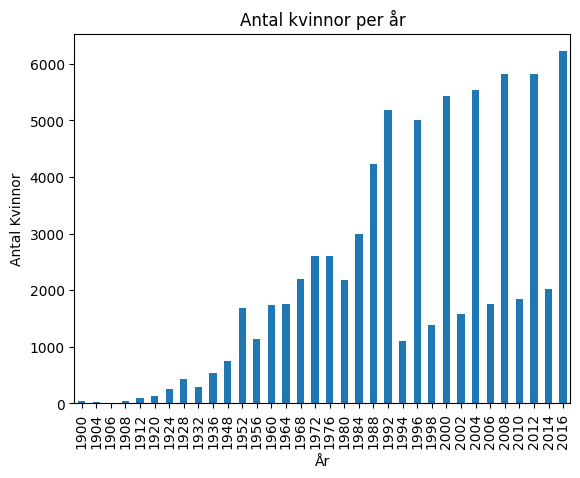

In [ ]:
female_attendance_all = female_all.groupby('Year')['ID'].count()

female_attendance_all.plot(kind='bar')
plt.title("Antal kvinnor per år")
plt.xlabel("År")
plt.ylabel("Antal Kvinnor")
plt.show()

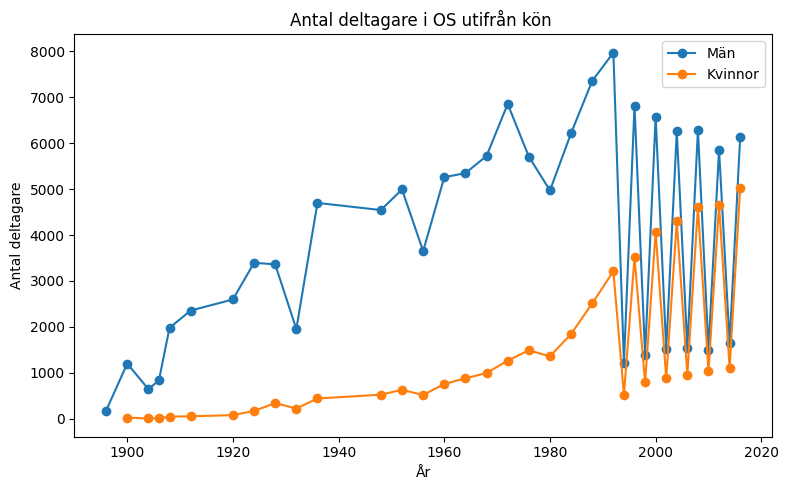

In [ ]:
import matplotlib.pyplot as plt

# Räkna antal unika deltagare per år för sommar/vinter
yearly_male_all = male_all.groupby('Year')['ID'].nunique()
yearly_female_all = female_all.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(yearly_male_all.index, yearly_male_all.values, marker='o', label='Män')
plt.plot(yearly_female_all.index, yearly_female_all.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare i OS utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # 👈 viktig för att se vilken linje som är vilken
plt.tight_layout()
plt.show()


C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\3674450215.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\3674450215.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



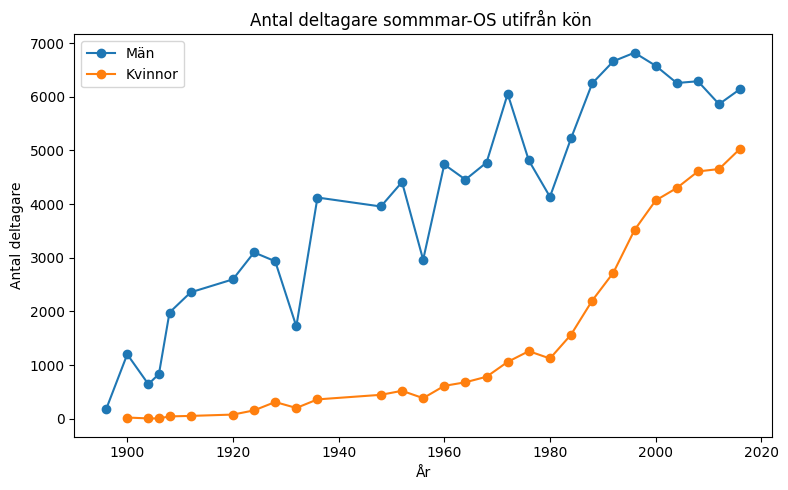

In [ ]:
summer_all_male = summer_all[data["Sex"] == "M"]
summer_all_female = summer_all[data["Sex"] == "F"]

summer_male_all = summer_all_male.groupby('Year')['ID'].nunique()
summer_female_all = summer_all_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(summer_male_all.index, summer_male_all.values, marker='o', label='Män')
plt.plot(summer_female_all.index, summer_female_all.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare sommmar-OS utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\1924149420.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\1924149420.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



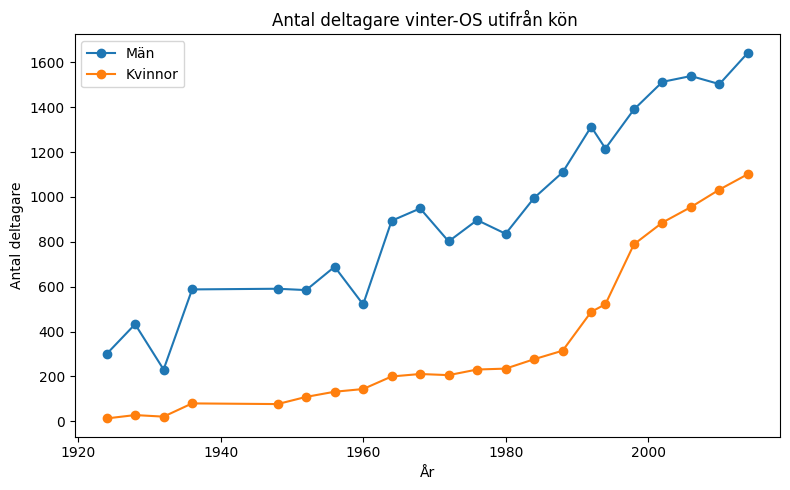

In [ ]:
winter_all_male = winter_all[data["Sex"] == "M"]
winter_all_female = winter_all[data["Sex"] == "F"]

winter_male_all = winter_all_male.groupby('Year')['ID'].nunique()
winter_female_all = winter_all_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(winter_male_all.index, winter_male_all.values, marker='o', label='Män')
plt.plot(winter_female_all.index, winter_female_all.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare vinter-OS utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # 👈 viktig för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\3418296385.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\3418296385.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



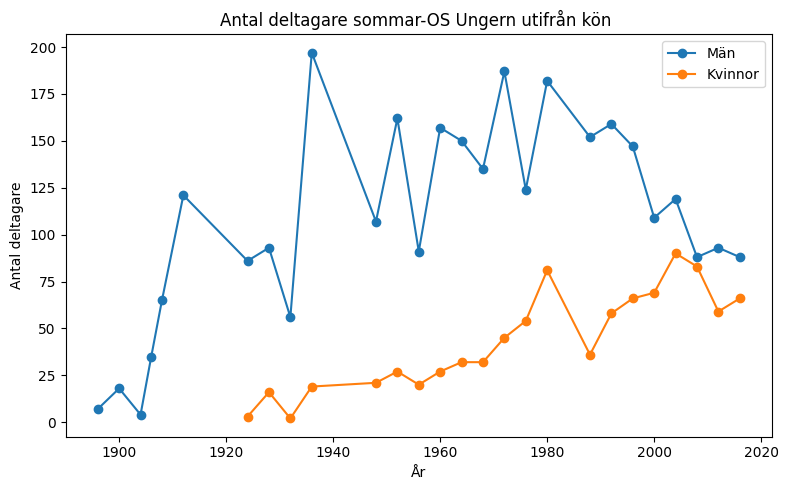

In [ ]:

hungary_unique = data[data["NOC"] == "HUN"]
summer_hungary = hungary_unique[hungary_unique["Season"] == "Summer"]

summer_hungary_male = summer_hungary[hungary_unique["Sex"] == "M"]
summer_hungary_female = summer_hungary[hungary_unique["Sex"] == "F"]

summer_male_hungary = summer_hungary_male.groupby('Year')['ID'].nunique()
summer_female_hungary = summer_hungary_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(summer_male_hungary.index, summer_male_hungary.values, marker='o', label='Män')
plt.plot(summer_female_hungary.index, summer_female_hungary.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare sommar-OS Ungern utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\3012456054.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_25176\3012456054.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



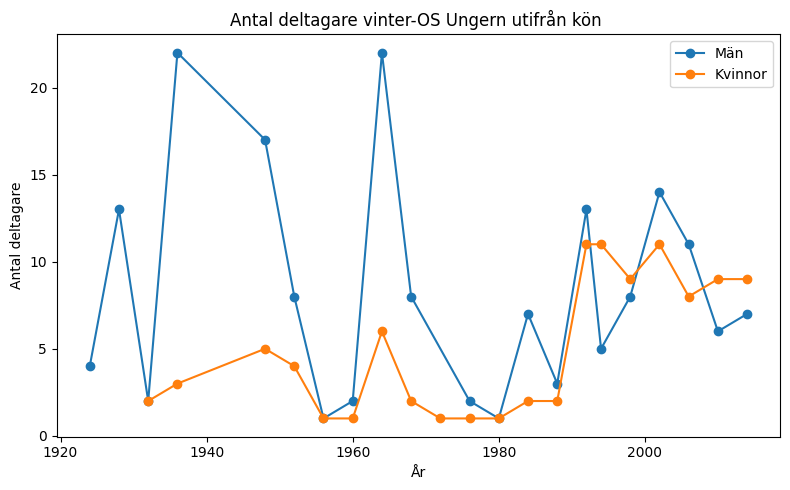

In [ ]:

winter_hungary = hungary_unique[hungary_unique["Season"] == "Winter"]   
winter_hungary_male = winter_hungary[hungary_unique["Sex"] == "M"]
winter_hungary_female = winter_hungary[hungary_unique["Sex"] == "F"]

winter_male_hungary = winter_hungary_male.groupby('Year')['ID'].nunique()
winter_female_hungary = winter_hungary_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(winter_male_hungary.index, winter_male_hungary.values, marker='o', label='Män')
plt.plot(winter_female_hungary.index, winter_female_hungary.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare vinter-OS Ungern utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

OS - vart det hölls har inverkan på deltagande!

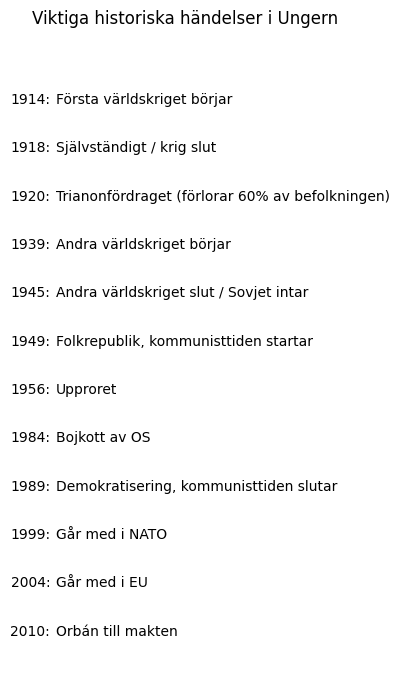

In [ ]:

years = [
    1914,
    1918,
    1920,
    1939,
    1945,
    1949,
    1956,
    1984,
    1989,
    1999,
    2004,
    2010,
]

events = [
    "Första världskriget börjar",
    "Självständigt / krig slut",
    "Trianonfördraget (förlorar 60% av befolkningen)",
    "Andra världskriget börjar",
    "Andra världskriget slut / Sovjet intar",
    "Folkrepublik, kommunisttiden startar",
    "Upproret",
    "Bojkott av OS",
    "Demokratisering, kommunisttiden slutar",
    "Går med i NATO",
    "Går med i EU",
    "Orbán till makten",
]

fig, ax = plt.subplots(figsize=(4, 7))

# Stäng av axlarna helt
ax.axis("off")

# Vi lägger raderna under varandra
n = len(years)
for i, (year, event) in enumerate(zip(years, events)):
    y = n - 1 - i  # så att det första hamnar högst upp
    ax.text(0.05, y, str(year) + ":", ha="right", va="center", fontsize=10)
    ax.text(0.07, y, event, ha="left", va="center", fontsize=10)

# Justera "koordinatsystemet" så att all text syns
ax.set_xlim(0, 1)
ax.set_ylim(-1, n)

plt.title("Viktiga historiska händelser i Ungern", pad=20)
plt.tight_layout()
plt.show()


Se hur många medlajer ungerska deltagere tagit genom åren:

In [ ]:

# Medalj-data (per idrottare)
hun_medals = hungary_unique.dropna(subset=["Medal"]).copy()

# Medalj-data unika per event/OS (undviker dubbelräkning i lag/grenar)
hun_unique_medals = (
    hun_medals.drop_duplicates(subset=["Games", "Event", "Medal", "NOC"])
    .copy()
)

print(f"Antal medaljer (idrottare-räknat): {len(hun_medals)}")
print(f"Antal unika medaljer (event/OS-räknat): {len(hun_unique_medals)}")


Antal medaljer (idrottare-räknat): 1135
Antal unika medaljer (event/OS-räknat): 510


Exempel:

Om Ungerns herrlag i vattenpolo tar 1 guld, och laget består av 13 spelare,
→ Då finns 13 rader i datasetet (en per idrottare),
→ Alla med Medal = "Gold" och Sport = "Water Polo".
→ Då blir det 13 medaljer i vattenpolo i den här beräkningen.

Det visar hur många individer som fått medalj i varje sport.
Bra för att se:

Hur många idrottare som faktiskt har fått medalj

Hur stort deltagandet i medaljgrenar varit

Men inte bra för att jämföra länder eller sporter rättvist (lagidrotter överrepresenterade).


Samma exempel:

Ungerns herrlag i vattenpolo tar 1 guld
→ även om 13 spelare står med i filen,
→ så räknas det bara som 1 guld.

Det visar hur många faktiska medaljer Ungern har vunnit i varje sport.
Bra för att se:

Landets verkliga OS-medaljresultat (som i medaljtabeller)

Jämförelser mellan länder och sporter

Sporter Ungern tagit flest medaljer i (alla deltagere räknat(alla i ett lag räknas) och per event(lagsporter räknas som en))

In [ ]:
hun_sports = hungary_unique['Sport'].unique()
hun_events = hungary_unique['Event'].unique()
print(f"{len(hun_sports)}")
print(f"{len(hun_events)}")

42
443


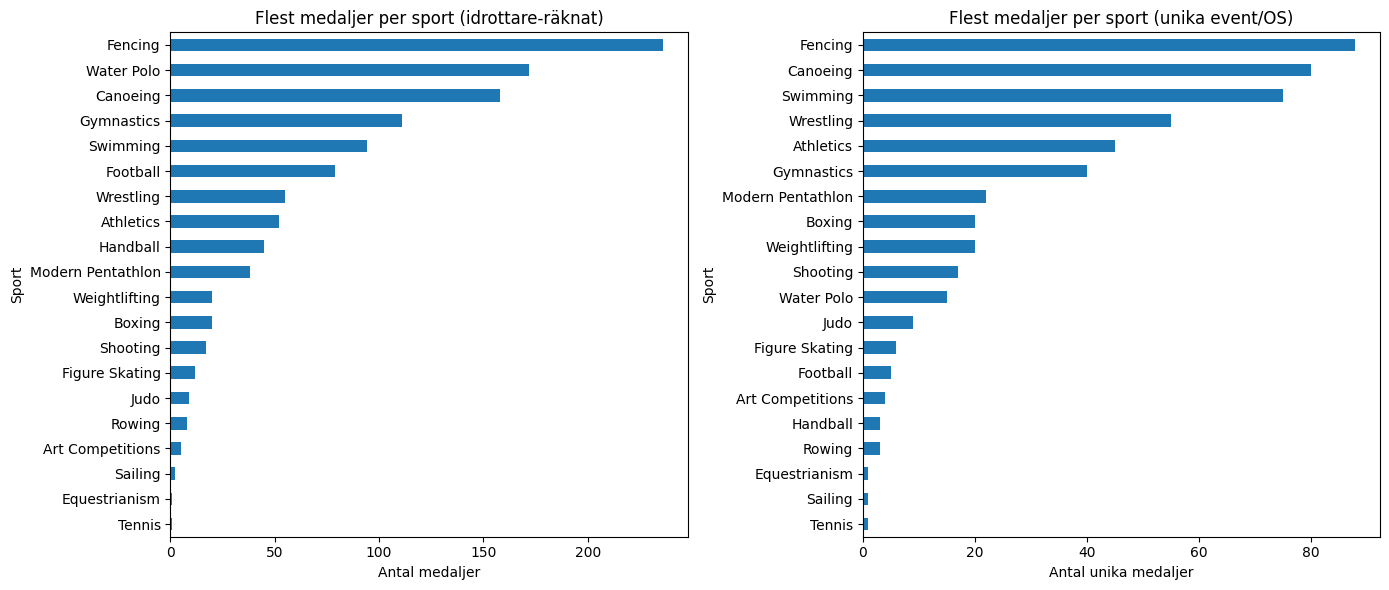

In [ ]:
# Alla lagmedlemmar räknas. 
medals_by_sport_athlete = (
    hun_medals.groupby("Sport")["Medal"].count().sort_values(ascending=False)
)

# Unika medaljer (per event/OS) ---
medals_by_sport_unique = (
    hun_unique_medals.groupby("Sport")["Medal"].count().sort_values(ascending=False)
)


# Plottar båda för att se skillnaden
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
medals_by_sport_athlete.head(42).plot(kind="barh", ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title("Flest medaljer per sport (idrottare-räknat)")
axes[0].set_xlabel("Antal medaljer")

medals_by_sport_unique.head(42).plot(kind="barh", ax=axes[1])
axes[1].invert_yaxis()
axes[1].set_title("Flest medaljer per sport (unika event/OS)")
axes[1].set_xlabel("Antal unika medaljer")

plt.tight_layout()
plt.show()



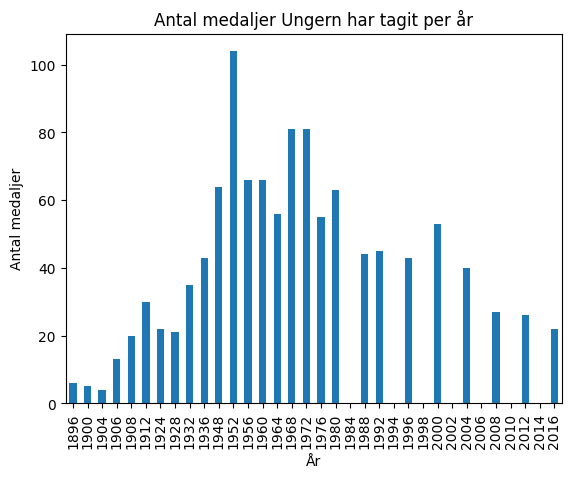

In [ ]:
medal_per_year = hungary_unique.groupby('Year')['Medal'].count()

medal_per_year.plot(kind='bar')
plt.title("Antal medaljer Ungern har tagit per år")
plt.xlabel("År")
plt.ylabel("Antal medaljer")
plt.show()

Antal brons, silver och gult Ungern tagit. 

In [ ]:
hun_unique_medals[hun_unique_medals['Medal'] == 0].shape[0]
hun_unique_medals['Medal'].value_counts() 

Medal
Gold      178
Bronze    176
Silver    156
Name: count, dtype: int64

Vilka sporter finns med? (OS Alla) 

In [ ]:
sports = data['Sport'].unique()
print(f"c) Antal sporter: {len(sports)}")
print(sports)

c) Antal sporter: 66
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


Statistik för åldern (OS Alla):

In [ ]:
age_stats = data['Age'].describe()
print("e) Statistik för ålder:")
print(age_stats[['mean', '50%', 'min', 'max', 'std']])

e) Statistik för ålder:
mean    25.556898
50%     24.000000
min     10.000000
max     97.000000
std      6.393561
Name: Age, dtype: float64


Vilket år hade flest deltagare?:

In [ ]:
participants_per_year = all_unique.groupby('Year')['ID'].nunique()
print("f) År med flest deltagare:")
print(participants_per_year.sort_values(ascending=False).head())

f) År med flest deltagare:
Year
1992    11183
2016    11179
2008    10899
2000    10647
2004    10557
Name: ID, dtype: int64


Top 10 länder med flest medaljer:

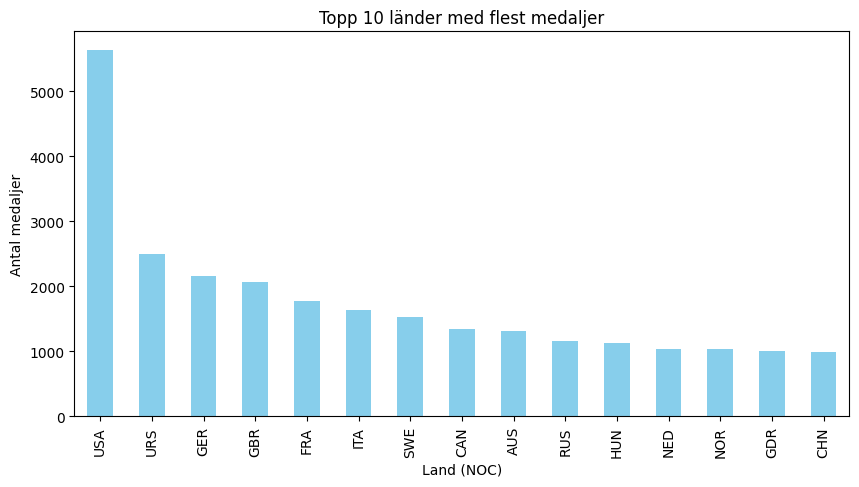

In [ ]:
medal_counts = data.dropna(subset=['Medal']).groupby('NOC')['Medal'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,5))
medal_counts.plot(kind='bar', color='skyblue')
plt.title("Topp 10 länder med flest medaljer")
plt.xlabel("Land (NOC)")
plt.ylabel("Antal medaljer")
plt.show()

Antal ungerska deltagare per OS (sommar vs vinter)

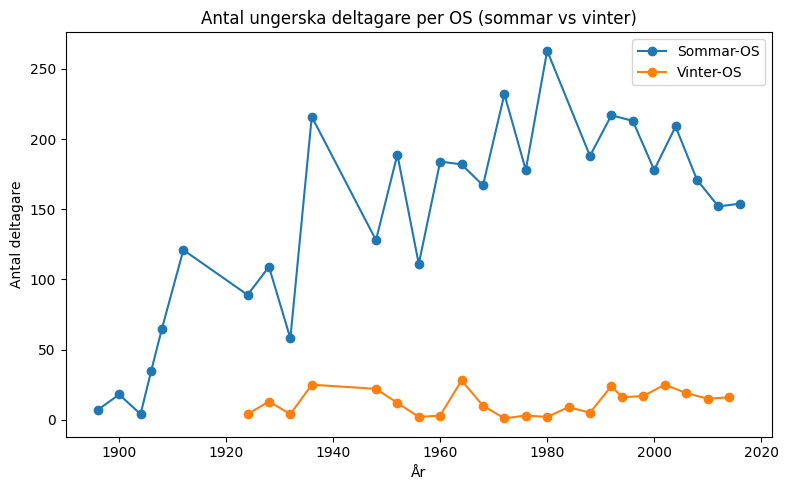

In [ ]:
import matplotlib.pyplot as plt

# Räkna antal unika deltagare per år för sommar/vinter
yearly_summer = summer_hungary.groupby('Year')['ID'].nunique()
yearly_winter = winter_hungary.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(yearly_summer.index, yearly_summer.values, marker='o', label='Sommar-OS')
plt.plot(yearly_winter.index, yearly_winter.values, marker='o', label='Vinter-OS')

plt.title("Antal ungerska deltagare per OS (sommar vs vinter)")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # se vilken linje som är vilken
plt.tight_layout()
plt.show()
